In [ ]:
# Tf =Term Frequency (Total number of documents / number of documets the token is present)
# IDF = Inverse Document Frequency (number of tokens / total nnumber of tokens)

***Importing Library***

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
corpus = [
    "Thor eating pizza, Loki is eating pizza, Ironman ate pizza already",
    "Apple is announcing new iphone tomorrow",
    "Tesla is announcing new model-3 tomorrow",
    "Google is announcing new pixel-6 tomorrow",
    "Microsoft is announcing new surface tomorrow",
    "Amazon is announcing new eco-dot tomorrow",
    "I am eating biryani and you are eating grapes"
]

In [5]:
v = TfidfVectorizer()
v.fit(corpus)
transform_output = v.transform(corpus)

In [6]:
print(v.vocabulary_)

{'thor': 25, 'eating': 10, 'pizza': 22, 'loki': 17, 'is': 16, 'ironman': 15, 'ate': 7, 'already': 0, 'apple': 5, 'announcing': 4, 'new': 20, 'iphone': 14, 'tomorrow': 26, 'tesla': 24, 'model': 19, 'google': 12, 'pixel': 21, 'microsoft': 18, 'surface': 23, 'amazon': 2, 'eco': 11, 'dot': 9, 'am': 1, 'biryani': 8, 'and': 3, 'you': 27, 'are': 6, 'grapes': 13}


In [9]:
v.get_feature_names_out()

array(['already', 'am', 'amazon', 'and', 'announcing', 'apple', 'are',
       'ate', 'biryani', 'dot', 'eating', 'eco', 'google', 'grapes',
       'iphone', 'ironman', 'is', 'loki', 'microsoft', 'model', 'new',
       'pixel', 'pizza', 'surface', 'tesla', 'thor', 'tomorrow', 'you'],
      dtype=object)

In [8]:
dir(v)

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_request_for_signature',
 '_char_ngrams',
 '_char_wb_ngrams',
 '_check_feature_names',
 '_check_n_features',
 '_check_params',
 '_check_stop_words_consistency',
 '_check_vocabulary',
 '_count_vocab',
 '_get_default_requests',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_limit_features',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_sort_features',
 '_stop_words_id',
 '_tfidf',
 '_validate_data',
 '_validate_ngram_range',
 '_validate_params',
 '_validate_vocabulary'

In [13]:
all_feature_names = v.get_feature_names_out()

for word in all_feature_names:
    
    indx = v.vocabulary_.get(word)
    
    idf_score = v.idf_[indx]
    
    print(f"{word} : {idf_score}")

already : 2.386294361119891
am : 2.386294361119891
amazon : 2.386294361119891
and : 2.386294361119891
announcing : 1.2876820724517808
apple : 2.386294361119891
are : 2.386294361119891
ate : 2.386294361119891
biryani : 2.386294361119891
dot : 2.386294361119891
eating : 1.9808292530117262
eco : 2.386294361119891
google : 2.386294361119891
grapes : 2.386294361119891
iphone : 2.386294361119891
ironman : 2.386294361119891
is : 1.1335313926245225
loki : 2.386294361119891
microsoft : 2.386294361119891
model : 2.386294361119891
new : 1.2876820724517808
pixel : 2.386294361119891
pizza : 2.386294361119891
surface : 2.386294361119891
tesla : 2.386294361119891
thor : 2.386294361119891
tomorrow : 1.2876820724517808
you : 2.386294361119891


In [14]:
corpus[: 2]

['Thor eating pizza, Loki is eating pizza, Ironman ate pizza already',
 'Apple is announcing new iphone tomorrow']

In [15]:
transform_output.toarray()[: 2]

array([[0.24266547, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.24266547, 0.        , 0.        ,
        0.40286636, 0.        , 0.        , 0.        , 0.        ,
        0.24266547, 0.11527033, 0.24266547, 0.        , 0.        ,
        0.        , 0.        , 0.72799642, 0.        , 0.        ,
        0.24266547, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.30652086,
        0.5680354 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.5680354 ,
        0.        , 0.26982671, 0.        , 0.        , 0.        ,
        0.30652086, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.30652086, 0.        ]])

In [ ]:
# Importing Dataset

In [25]:
import pandas as pd

#read the data into a pandas dataframe
df = pd.read_csv("C:/Users/user/Downloads/ecommerceDataset.csv", header = None)
df.head()

,0,1
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...


In [27]:
df.columns = ['label', 'text']
df.head()

,label,text
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...


In [28]:
df.shape

(50425, 2)

In [29]:
df['label'].value_counts()

label
Household                 19313
Books                     11820
Electronics               10621
Clothing & Accessories     8671
Name: count, dtype: int64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50425 entries, 0 to 50424
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   50425 non-null  object
 1   text    50424 non-null  object
dtypes: object(2)
memory usage: 788.0+ KB


In [31]:
df.isna().sum()

label    0
text     1
dtype: int64

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from plotly.subplots import make_subplots

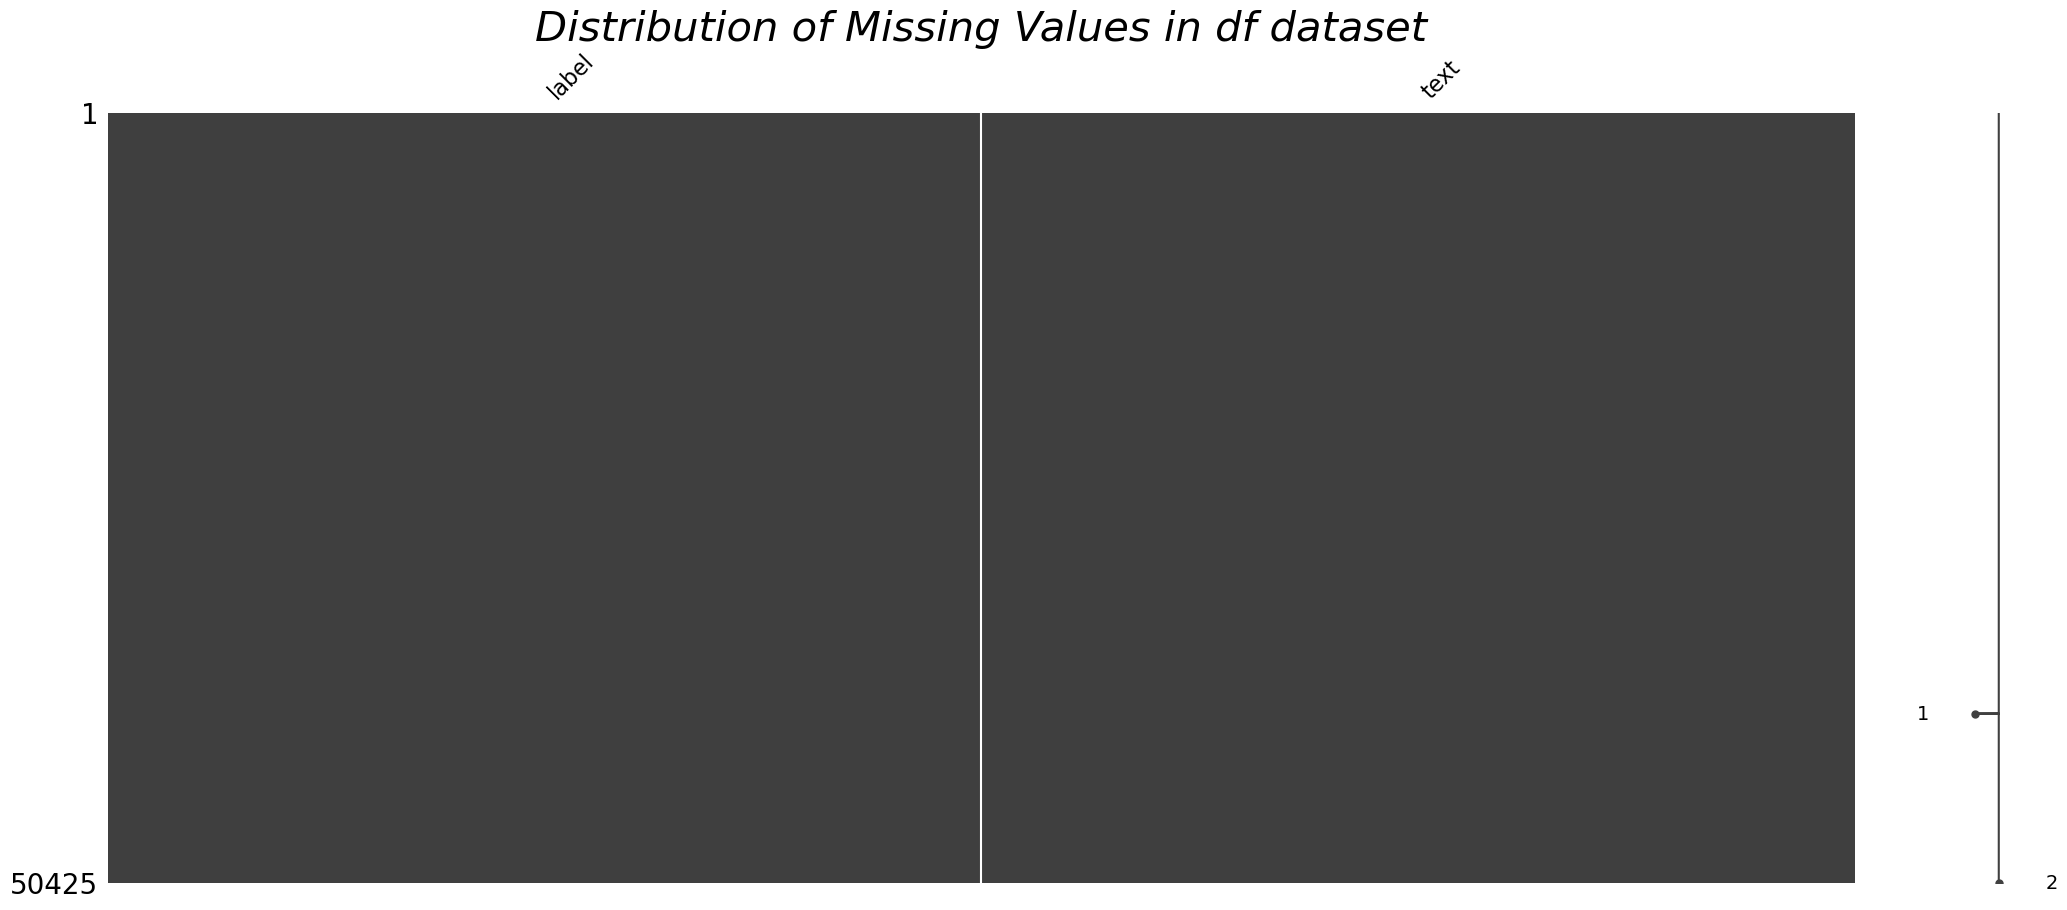

In [39]:
def plot_miss_vals(df, ds_name="df"):
    msno.matrix(df)
    plt.title(f"Distribution of Missing Values in {ds_name} dataset", fontsize=30, fontstyle="oblique")
    plt.show()

plot_miss_vals(df, ds_name="df")

In [40]:
null_val = df[df['text'].isnull()].index[0]
null_val

39330

In [42]:
df.drop([null_val], axis=0, inplace = True)

In [44]:
def uni_vals(df, ds_name='df'):
    
    print(f"The number of unique values in each column in {ds_name} dataset:\n")
    print(df.nunique())

uni_vals(df, ds_name = 'df')

The number of unique values in each column in df dataset:

label        4
text     27802
dtype: int64


In [45]:
df['label'].value_counts()

label
Household                 19313
Books                     11820
Electronics               10621
Clothing & Accessories     8670
Name: count, dtype: int64

In [46]:
df['label_num'] = df['label'].map({
    'Household' : 0, 
    'Books': 1, 
    'Electronics': 2, 
    'Clothing & Accessories': 3
})

In [47]:
df.head(5)

,label,text,label_num
0,Household,Paper Plane Design Framed Wall Hanging Motivat...,0
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ...",0
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...,0
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1...",0
4,Household,Incredible Gifts India Wooden Happy Birthday U...,0


In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.text, 
    df.label_num, 
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df.label_num
)

In [50]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (40339,)
Shape of X_test:  (10085,)


In [51]:
X_train.head()

6291     TCLPVC Economy Bamboo Blind Chick Window Close...
10681    Primeway® Metaltex Rap Box 3 Grater with Conta...
14771    IFB 20 L Convection Microwave Oven (20SC2, Met...
31385    ahhaaaa Boy's Blended Waistcoat, Shirt and Tro...
28380    Animals and the Shaping of Modern Medicine: On...
Name: text, dtype: object

In [52]:
y_train.value_counts()

label_num
0    15450
1     9456
2     8497
3     6936
Name: count, dtype: int64

In [53]:
y_test.value_counts()

label_num
0    3863
1    2364
2    2124
3    1734
Name: count, dtype: int64

In [55]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),    
     ('KNN', KNeighborsClassifier())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      3863
           1       0.97      0.96      0.96      2364
           2       0.96      0.94      0.95      2124
           3       0.97      0.97      0.97      1734

    accuracy                           0.96     10085
   macro avg       0.96      0.96      0.96     10085
weighted avg       0.96      0.96      0.96     10085



In [56]:
X_test[:5]

41536    Seagate 4TB Backup Plus Hub USB 3.0 Desktop 3....
9671     Sunflame GT Pride 2 Burner Gas Stove, Black St...
49630    iVoltaa Next Gen Compact Wired Selfie Stick fo...
33658    TWO DOTS Air Bra for Girls and Women Combo of ...
19317    The Secret of Secrets: The Secrets of the Gold...
Name: text, dtype: object

In [57]:
y_test[:5]

41536    2
9671     0
49630    2
33658    3
19317    1
Name: label_num, dtype: int64

In [58]:
y_pred[:5]

array([2, 0, 2, 3, 1], dtype=int64)

In [59]:
from sklearn.naive_bayes import MultinomialNB


#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),    
     ('Multi NB', MultinomialNB())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.94      3863
           1       0.98      0.92      0.95      2364
           2       0.97      0.90      0.93      2124
           3       0.98      0.93      0.95      1734

    accuracy                           0.94     10085
   macro avg       0.96      0.93      0.94     10085
weighted avg       0.94      0.94      0.94     10085



In [60]:
from sklearn.ensemble import RandomForestClassifier

#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        #using the ngram_range parameter 
     ('Random Forest', RandomForestClassifier())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      3863
           1       0.98      0.98      0.98      2364
           2       0.98      0.94      0.96      2124
           3       0.99      0.97      0.98      1734

    accuracy                           0.97     10085
   macro avg       0.98      0.97      0.97     10085
weighted avg       0.97      0.97      0.97     10085



In [61]:
import spacy

# load english language model and create nlp object from it
nlp = spacy.load("en_core_web_sm") 

def preprocess(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    
    return " ".join(filtered_tokens) 

In [63]:
df['preprocessed_txt'] = df['text'].apply(preprocess) 

In [64]:
df.head()

,label,text,label_num,preprocessed_txt
0,Household,Paper Plane Design Framed Wall Hanging Motivat...,0,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ...",0,SAF Floral Framed Painting Wood 30 inch x 10 i...
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...,0,saf uv texture Modern Art Print Framed Paintin...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1...",0,SAF Flower Print Framed Painting Synthetic 13....
4,Household,Incredible Gifts India Wooden Happy Birthday U...,0,incredible Gifts India Wooden Happy Birthday U...


In [65]:
df.text[0]

'Paper Plane Design Framed Wall Hanging Motivational Office Decor Art Prints (8.7 X 8.7 inch) - Set of 4 Painting made up in synthetic frame with uv textured print which gives multi effects and attracts towards it. This is an special series of paintings which makes your wall very beautiful and gives a royal touch. This painting is ready to hang, you would be proud to possess this unique painting that is a niche apart. We use only the most modern and efficient printing technology on our prints, with only the and inks and precision epson, roland and hp printers. This innovative hd printing technique results in durable and spectacular looking prints of the highest that last a lifetime. We print solely with top-notch 100% inks, to achieve brilliant and true colours. Due to their high level of uv resistance, our prints retain their beautiful colours for many years. Add colour and style to your living space with this digitally printed painting. Some are for pleasure and some for eternal blis

In [66]:
df.preprocessed_txt[0]

'Paper Plane Design Framed Wall Hanging Motivational Office Decor Art Prints 8.7 x 8.7 inch set 4 Painting synthetic frame uv texture print give multi effect attract special series painting make wall beautiful give royal touch painting ready hang proud possess unique painting niche apart use modern efficient print technology print ink precision epson roland hp printer innovative hd printing technique result durable spectacular look print high lifetime print solely notch 100 ink achieve brilliant true colour high level uv resistance print retain beautiful colour year add colour style live space digitally print painting pleasure eternal bliss.so bring home elegant print lushe rich color make sheer elegance friend family.it treasure forever lucky recipient liven place intriguing painting high definition hd graphic digital print home office room'

In [67]:
X_train, X_test, y_train, y_test = train_test_split(
    df.preprocessed_txt, 
    df.label_num,
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df.label_num
)

In [68]:
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        #using the ngram_range parameter 
     ('Random Forest', RandomForestClassifier())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      3863
           1       0.98      0.97      0.98      2364
           2       0.98      0.95      0.96      2124
           3       0.98      0.98      0.98      1734

    accuracy                           0.97     10085
   macro avg       0.98      0.97      0.97     10085
weighted avg       0.97      0.97      0.97     10085



In [69]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[3804,   20,   23,   16],
       [  45, 2303,    9,    7],
       [  92,   11, 2015,    6],
       [  27,    7,    6, 1694]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

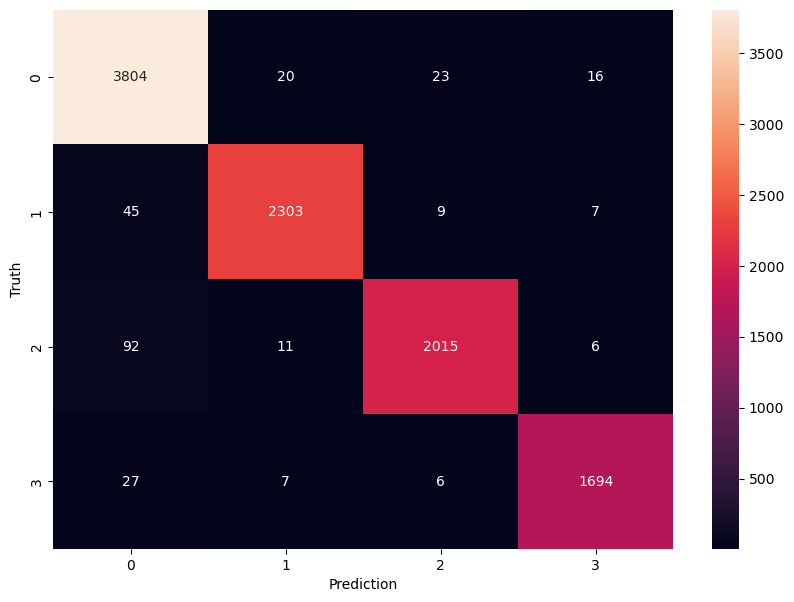

In [70]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')